In [1]:
#importing all the necessary libraries

In [2]:
#Analysing the Diwali Sales Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
#reading the file into the data frame

In [9]:
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [10]:
df.shape

(11251, 15)

In [11]:
#there are 11251 rows and 15 columns

In [12]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [13]:
#check the null values missing values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [15]:
#drop the unwanted columns

In [16]:
df.drop(columns=['Status','unnamed1'],inplace=True)

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [18]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [19]:
#drop the null values

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(11239, 13)

In [22]:
df['Amount'] = df['Amount'].astype('int')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [24]:
#describe() method return the min and max value  and std it give statisticall information for numerical columns

In [25]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [26]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [28]:
#EDA (Exploratory data analysis)

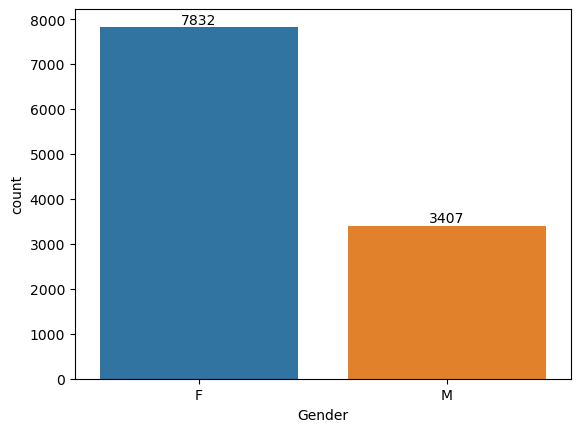

In [32]:
ax=sns.countplot(x='Gender' ,data=df)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

## from the above graph we say that most of the buyers are females 

In [33]:
df.groupby('Gender',as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


In [34]:
sales_gener_wise = df.groupby('Gender',as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)

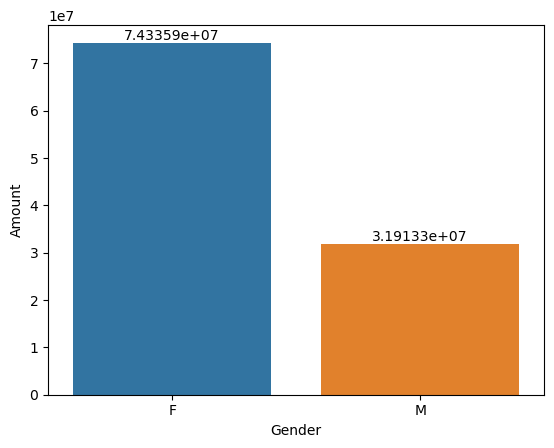

In [36]:
ax=sns.barplot(x='Gender',y='Amount' ,data=sales_gener_wise)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

## from the above graph we conclude  that purchasing power of females is very high compare to males

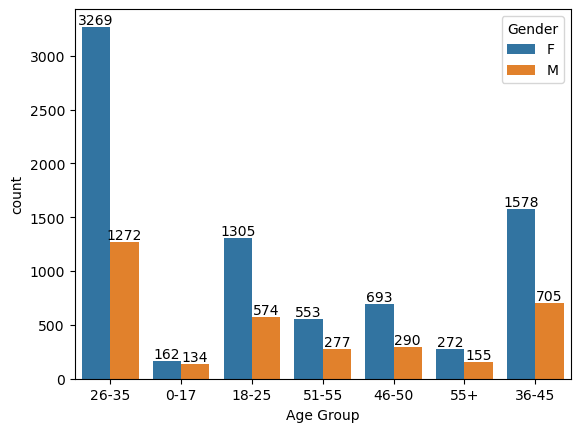

In [39]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

###  from the above graph we conclude that more number of sales from the customers age group between 26-35

In [40]:
#state wise top 10 orders

In [41]:
df.groupby('State',as_index=False)['Orders'].sum().sort_values('Orders',ascending=False)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


In [43]:
state_orders = df.groupby('State',as_index=False)['Orders'].sum().sort_values('Orders',ascending=False).head(10)

<Axes: xlabel='State', ylabel='Orders'>

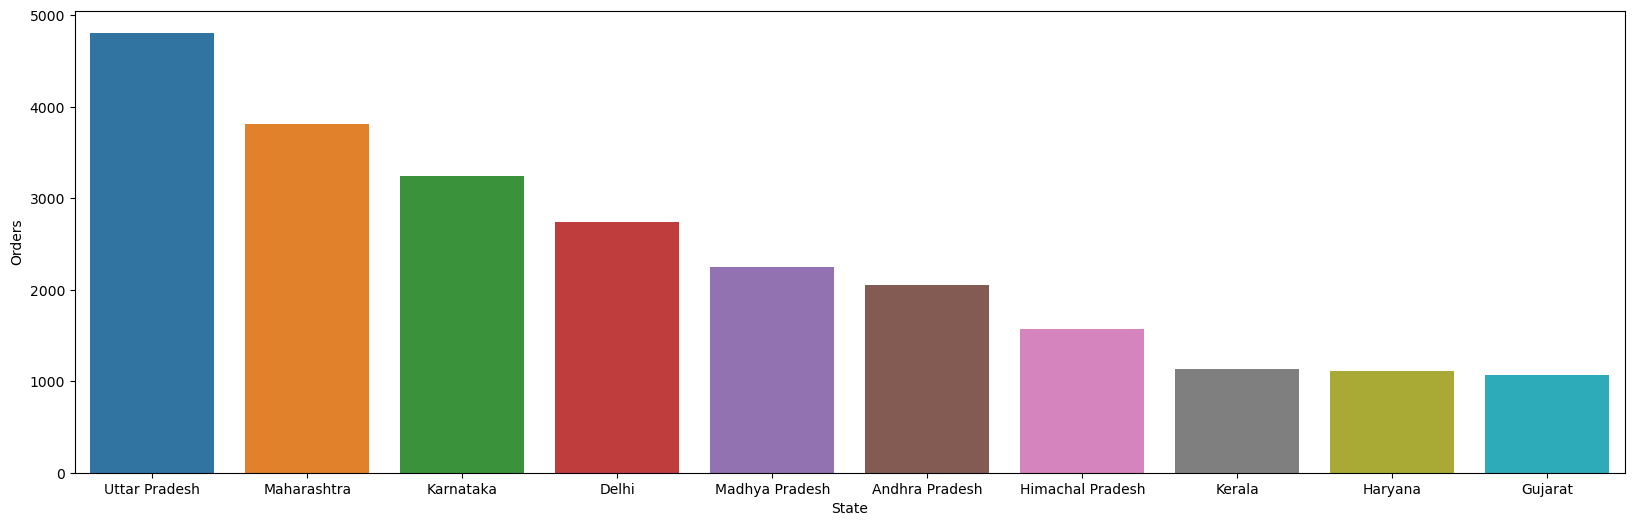

In [44]:
plt.figure(figsize=(20,6))
sns.barplot(data= state_orders,x='State',y='Orders')

In [45]:
#state wise top 10 revenues 

In [46]:
state_amount = df.groupby('State',as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).head(10)

<Axes: xlabel='State', ylabel='Amount'>

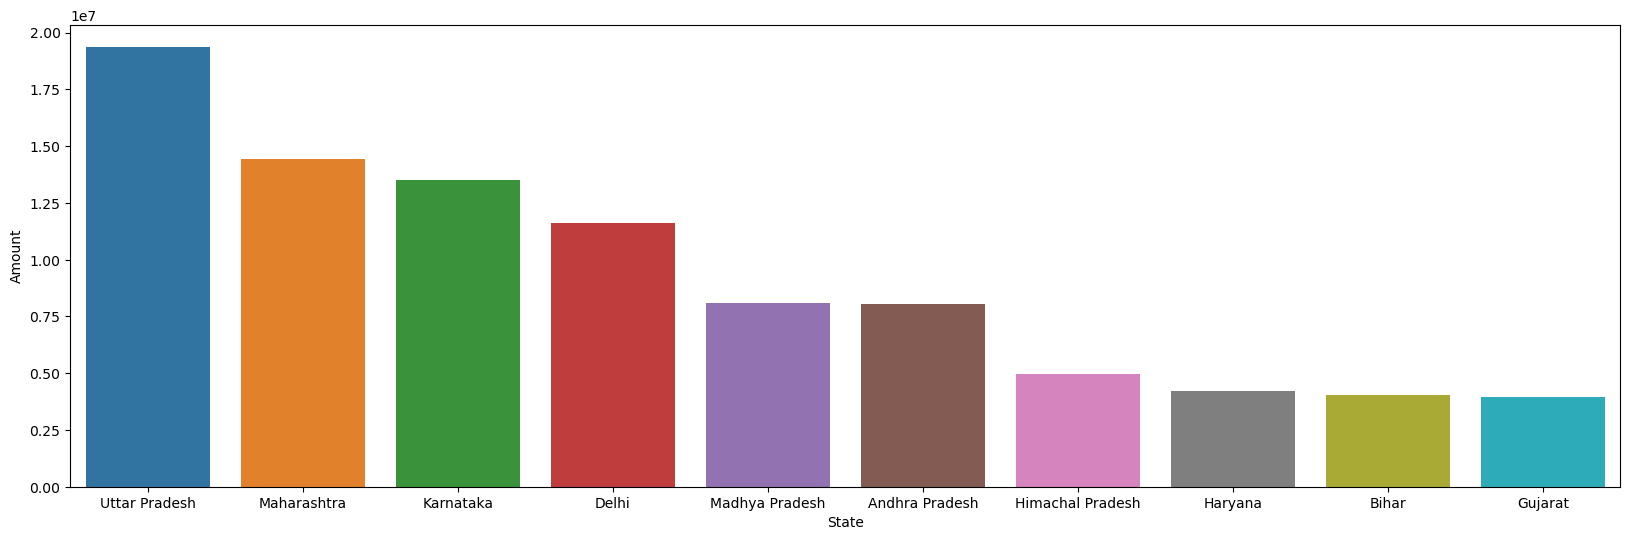

In [47]:
plt.figure(figsize=(20,6))
sns.barplot(data= state_amount,x='State',y='Amount')

### from the above graph the most of the orders and the sales income from the Uttar Pradesh and Maharastra ,then Karnataka

In [49]:
#marital status

In [50]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

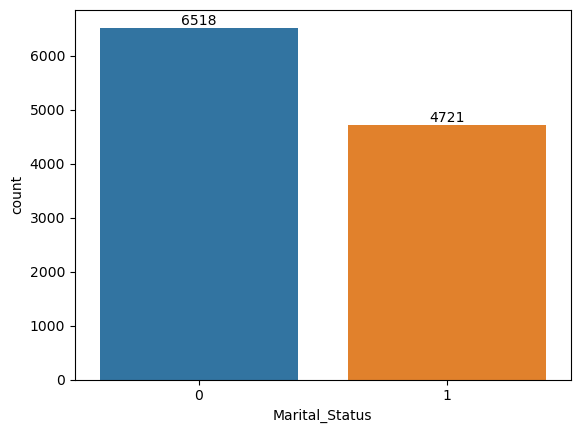

In [51]:
ax=sns.countplot(data=df,x='Marital_Status')
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

In [52]:
#Occupation

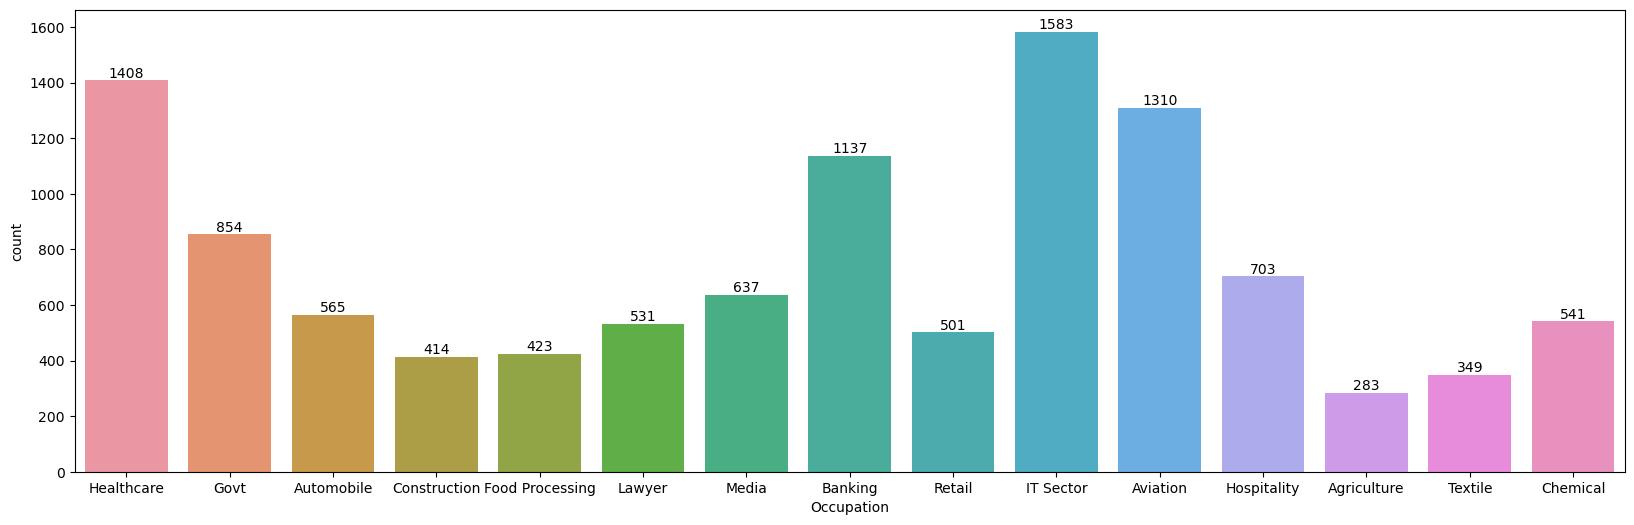

In [54]:
plt.figure(figsize=(20,6))

ax=sns.countplot(data=df,x='Occupation')
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

### from the above graph maximum peoples are from the IT sector and Healthcare and Aviation

In [57]:
occupation_sales = df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).head(10)

In [56]:
occupation_sales

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<Axes: xlabel='Occupation', ylabel='Amount'>

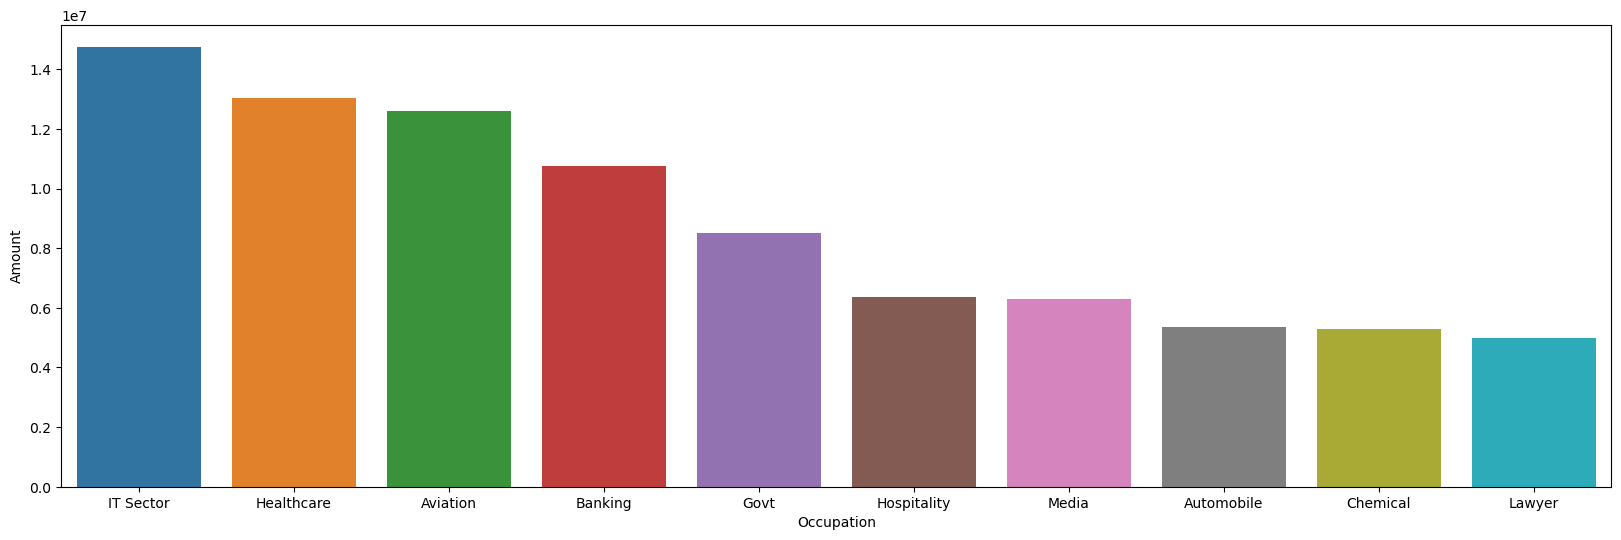

In [58]:
plt.figure(figsize=(20,6))
sns.barplot(data= occupation_sales,x='Occupation',y='Amount')

### from the above graph maximum sale are from employee sector category is IT sector and Healthcare and Aviation

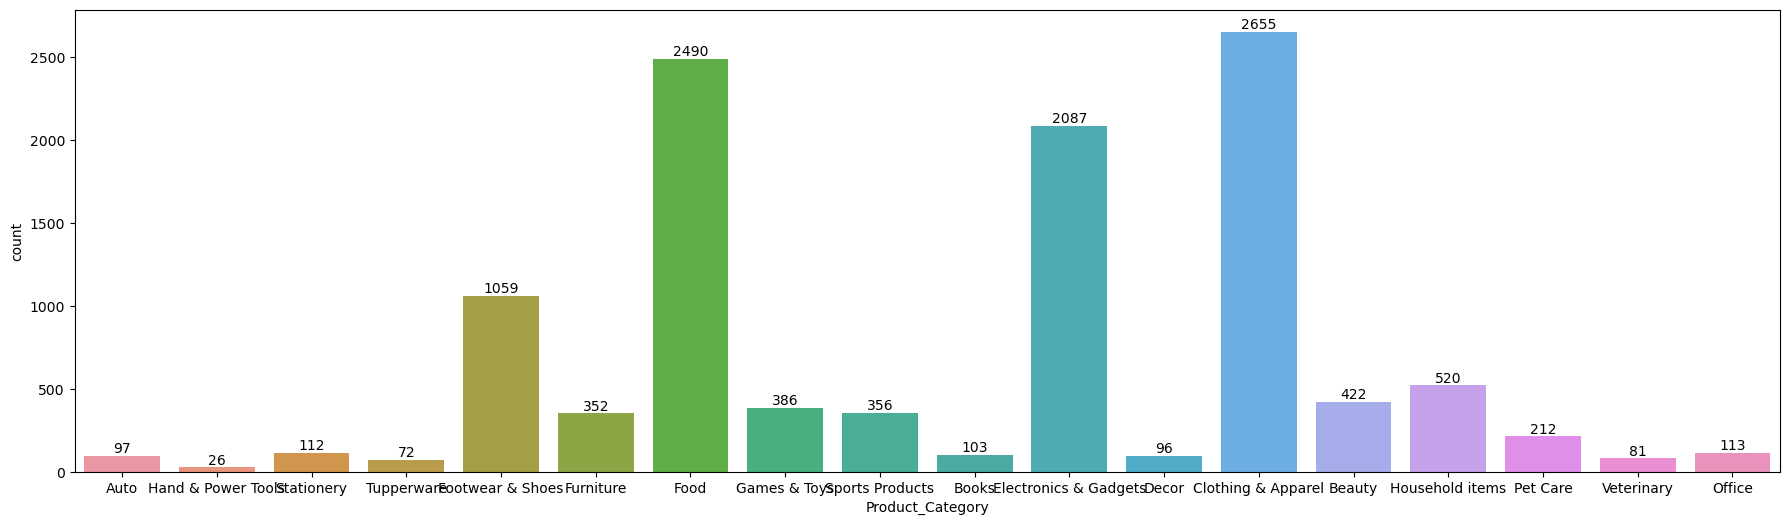

In [62]:
plt.figure(figsize=(22,6))

ax=sns.countplot(data=df,x='Product_Category')
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

### most of the orders from the Food and Clothing and electronic gadgets